<a href="https://colab.research.google.com/github/lakatosgabor/OpenCV_gyakorlat/blob/main/1_konzultacio_5_resz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. OpenCV importálás
A kódolás megkezdése előtt érdemes az Open CV verzióját lekérni.
Egyrészt meg kell vizsgálnunk, hogy létezik-e a futtatókörnyezetben, másrészt az egyes függvényhívások, és a függvények paraméterezései verziónként eltérő lehet.

Ha nem áll rendelkezésre, hozz létre egy kód blokkot a bal felső sarokban található " + Kód " gommbal, majd futtasd a követező parancsot:

```
!pip install opencv-python-headless
```


In [6]:
import cv2 as cv
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow
import numpy as np

# OpenCV verziójának lekérdezése
versionOfOpenCV = cv.__version__
print("OpenCV verzió: " + versionOfOpenCV)

OpenCV verzió: 4.8.0


#2. Drive csatlakoztatása

Futtasd az alábbi kódot a Google Drive tárhely csatlkoztatásához.
Add meg a Google által kért engedélyeket.

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#3. Kép betöltése Google Drive-ból
A Drive-ba feltölött fájlokat a "/content/drive/MyDrive/" útvonal alatt érhetjük el. Az útvonal megtekinthető a bal oldali File Expoler-ben. Egy adott fájlt javasolt először kikeresni az Expolerben, majd jobb gombbal kattintva másoljuk ki a fájl elérési útvonalát. Ezáltal elkerülhetjük az elgépeléseket.

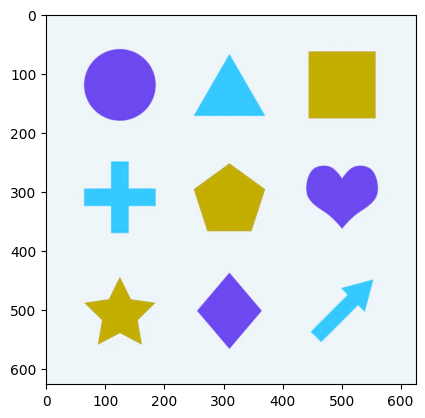

In [69]:
src = cv.imread("/content/drive/MyDrive/Pannon/Demonstrátori/órai anyagok/shapes.jpg")
plt.imshow(src)

#4. Kör detektációja, Hough transzformáció



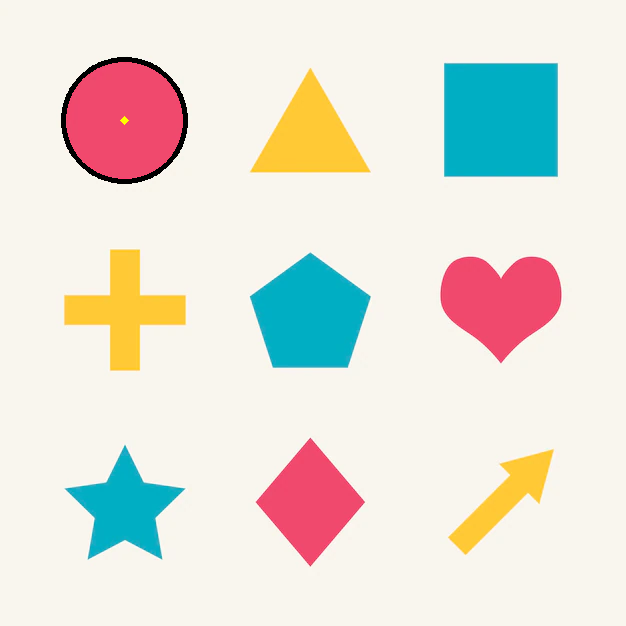

In [70]:
# Egy másolatot készítünk a bemeneti képről, amelyre rajzoljuk a köröket.
output = src.copy()

# A bemeneti képet szürkeárnyalatossá alakítjuk.
gray = cv.cvtColor(src, cv.COLOR_BGR2GRAY)

# Eltávolítjuk a zajt a képről egy medián elmosással.
gray = cv.medianBlur(gray, 5)

# Hough transzformációt alkalmazunk a körök detektálására a szürkeárnyalatos képen.
circles = cv.HoughCircles(gray, cv.HOUGH_GRADIENT, 1, 49,
                          param1=70, param2=40, minRadius=0, maxRadius=0)

# Az észlelt körök paramétereit egész számokká alakítjuk és kerekítjük.
detected_circles = np.uint16(np.around(circles))

# Végigmegyünk az észlelt körökön és kirajzoljuk őket a kimeneti képre.
for (x, y ,r) in detected_circles[0, :]:
    cv.circle(output, (x, y), r, (0, 0, 0), 3)  # Kör kerületének kirajzolása
    cv.circle(output, (x, y), 2, (0, 255, 255), 3)  # Középpont kirajzolása

# Az eredménykép megjelenítése a cv2_imshow() függvény segítségével.
cv2_imshow(output)

# Várunk, amíg egy billentyű lenyomására várunk, majd bezárjuk az összes ablakot.
cv.waitKey(0)
cv.destroyAllWindows()


# 5. Egyenes detektáció Hough transzformáció


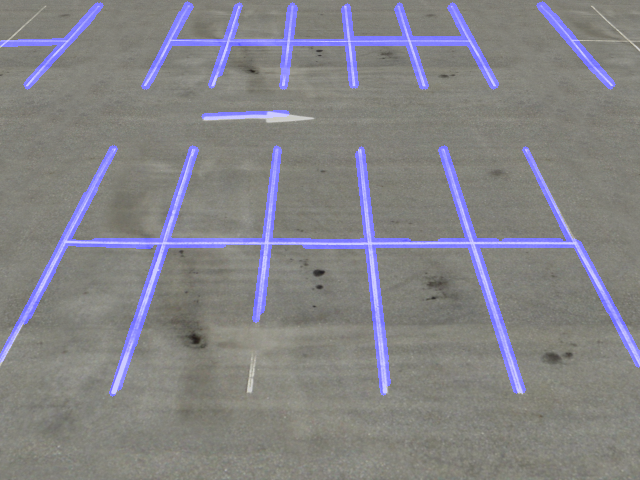

In [113]:
src = cv.imread("/content/drive/MyDrive/Pannon/Demonstrátori/órai anyagok/road.png")

gray = cv.cvtColor(src,cv.COLOR_BGR2GRAY)

kernel_size = 5
blur_gray = cv.GaussianBlur(gray,(kernel_size, kernel_size),0)


low_threshold = 50
high_threshold = 150
edges = cv.Canny(blur_gray, low_threshold, high_threshold)

rho = 1  # distance resolution in pixels of the Hough grid
theta = np.pi / 180  # angular resolution in radians of the Hough grid
threshold = 15  # minimum number of votes (intersections in Hough grid cell)
min_line_length = 50  # minimum number of pixels making up a line
max_line_gap = 20  # maximum gap in pixels between connectable line segments
line_image = np.copy(src) * 0  # creating a blank to draw lines on

# Run Hough on edge detected image
# Output "lines" is an array containing endpoints of detected line segments
lines = cv.HoughLinesP(edges, rho, theta, threshold, np.array([]),
                    min_line_length, max_line_gap)

for line in lines:
    for x1,y1,x2,y2 in line:
      cv.line(line_image,(x1,y1),(x2,y2),(255,0,0),5)

lines_edges = cv.addWeighted(src, 0.8, line_image, 1, 0)

cv2_imshow(lines_edges)